## Import

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc, ConfusionMatrixDisplay 
import sys, os
%matplotlib inline 

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## Reading files

In [31]:
df = pd.read_csv('StudentData.csv')
df

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,2,3,316,104,3,3.0,3.5,8.00,1,1.0
3,3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,398,399,312,103,3,3.5,4.0,8.78,0,0.0


## Preprocessing and EDA

In [32]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.drop(["Serial No."], axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,1.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1.0
396,325,107,3,3.0,3.5,9.11,1,1.0
397,330,116,4,5.0,4.5,9.45,1,1.0
398,312,103,3,3.5,4.0,8.78,0,0.0


<IPython.core.display.Javascript object>

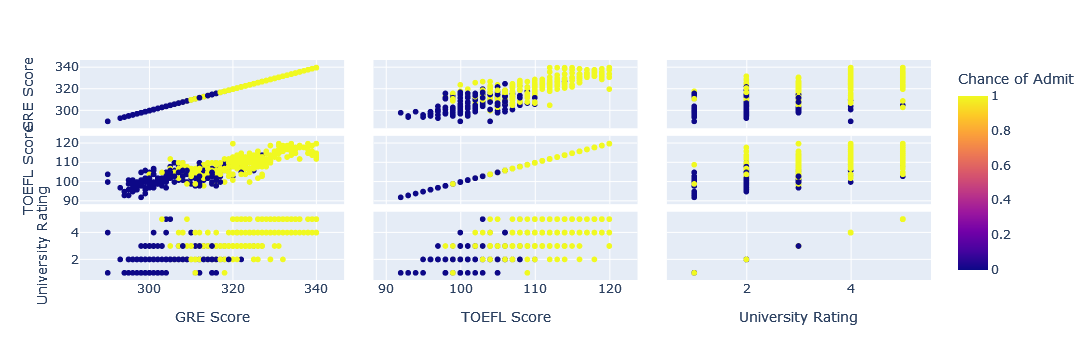

In [33]:
grafico = px.scatter_matrix(df, dimensions = ['GRE Score','TOEFL Score','University Rating'] , color ='Chance of Admit ')
grafico.show()

<AxesSubplot:xlabel='Chance of Admit ', ylabel='count'>

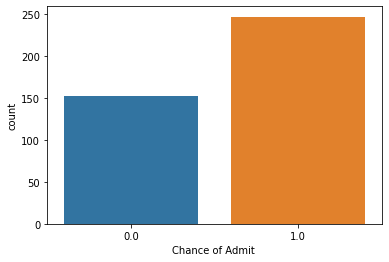

In [34]:
sns.countplot(df['Chance of Admit '])

In [35]:
df.isnull().sum() 

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [36]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.617500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.486606
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


In [37]:
y = df['Chance of Admit ']
print(f'Target value counts:\n{y.value_counts()}\n')
print(f'The ratio of 0 to 1:\n{y.value_counts()/df.shape[0]}')

Target value counts:
1.0    247
0.0    153
Name: Chance of Admit , dtype: int64

The ratio of 0 to 1:
1.0    0.6175
0.0    0.3825
Name: Chance of Admit , dtype: float64


In [38]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [39]:
from sklearn.preprocessing import StandardScaler #Importing the lib to Standard scaler the values
scaler_student = StandardScaler() #Creating the variaable to StandardScaler

In [40]:
x_student = scaler_student.fit_transform(X) #Standarding values on the X variable
x_student = pd.DataFrame(x_student, columns = X.columns)
x_student

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975
...,...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592,0.909112
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126,0.909112
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006,0.909112
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036,-1.099975


## Model Training

In [42]:
train, test, target, y_test = train_test_split( x_student, y, test_size=0.2, random_state=4)
# X_train, X_test, y_train, y_test

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

algorithm_score = []
score_Lr = [] 

oof_Lr = np.zeros(len(train)) 
pred_Lr = np.zeros(len(test)) 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    for fold_ , (train_ind, val_ind) in enumerate(folds.split(train, target)): 
        print('fold:', fold_,' - Starting ...') 
        trn_data, val_data = train.iloc[train_ind], train.iloc[val_ind] 
        y_train, y_val = target.iloc[train_ind], target.iloc[val_ind] 

        Lr = LogisticRegression(max_iter=4000, solver= algo, random_state=42) 
        Lr.fit(trn_data, y_train) 
        oof_Lr[val_ind] = Lr.predict_proba(val_data)[:, 1] 
        print('fold auc', roc_auc_score(y_val, oof_Lr[val_ind])) 
        score_Lr.append(roc_auc_score(y_val, oof_Lr[val_ind])) 
        pred_Lr += Lr.predict_proba(test)[:, 1]/folds.n_splits 

        score = log_loss(y_val, oof_Lr[val_ind])
        print(f'Logloss:{score}\n')
        

    print(f'Lr Model auc with {algo}:  ...>, {np.mean(score_Lr)}')
    
    np.save('oof_lr', oof_Lr) 
    np.save('pred_lr', pred_Lr) 
    
    algorithm_score.append(f'Max score of all algorithms = {np.mean(score_Lr)}')
    
print(max(algorithm_score))


<IPython.core.display.Javascript object>

fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.90625
Logloss:0.37555927174755077

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9645833333333333
Logloss:0.2514934719143904

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.953125
Logloss:0.2633454252235441

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9097435897435898
Logloss:0.36020794683845264

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9456410256410257
Logloss:0.30269184480465633

Lr Model auc with newton-cg:  ...>, 0.9358685897435898
fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.90625
Logloss:0.375558849944297

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9645833333333333
Logloss:0.2514936844743433

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.953125
Logloss:0.2633454705228171

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9097435897435898
Logloss:0.36020837314690746

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9456410256410257
Logloss:0.302691577725853

Lr Model auc with lbfgs:  ...>, 0.9358685897435898
fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9072916666666667
Logloss:0.37299627250270384

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9645833333333333
Logloss:0.25227494948123275

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.953125
Logloss:0.2656761396151627

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9097435897435898
Logloss:0.3605939368759131

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9456410256410257
Logloss:0.30300710073716475

Lr Model auc with liblinear:  ...>, 0.9359380341880342
fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.90625
Logloss:0.37555895135326856

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9645833333333333
Logloss:0.25149243777350916

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.953125
Logloss:0.263350202134014

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9097435897435898
Logloss:0.3602079543135803

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9456410256410257
Logloss:0.3026921520407937

Lr Model auc with sag:  ...>, 0.9359206730769232
fold: 0  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.90625
Logloss:0.37555194578516016

fold: 1  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9645833333333333
Logloss:0.25149071950075186

fold: 2  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.953125
Logloss:0.2633497857855478

fold: 3  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9097435897435898
Logloss:0.36021791590886865

fold: 4  - Starting ...


<IPython.core.display.Javascript object>

fold auc 0.9456410256410257
Logloss:0.3026969827128877

Lr Model auc with saga:  ...>, 0.9359102564102565
Max score of all algorithms = 0.9359380341880342


## Evaluation on best model

In [44]:
LR = LogisticRegression(max_iter=4000, solver= 'newton-cg', random_state=42).fit(train, target)
yhat = LR.predict(test)
yhat_prob = LR.predict_proba(test)

<IPython.core.display.Javascript object>

In [45]:
roc_auc_score(y_test, yhat)

0.8785385121790651

In [46]:
print('Confusion matrix\n',confusion_matrix(y_test,LR.predict(test)))

Confusion matrix
 [[26  5]
 [ 4 45]]


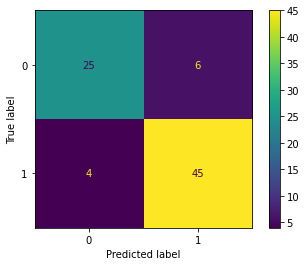

accuracy = 0.875,
recall = 0.9183673469387755,
precision = 0.8823529411764706,
f1-score = 0.9


In [47]:
predictions = Lr.predict(test)

#  confusion matrix
cm = confusion_matrix(y_test, predictions, labels=[0, 1])
cm_displ = ConfusionMatrixDisplay(cm)
cm_displ.plot()
plt.show()

#  calculate accuracy:
accuracy = np.mean(predictions==y_test)
recall = cm[1, 1]/cm[1, :].sum()
precision = cm[1, 1]/cm[:, 1].sum()
f1 = 2 * ((recall * precision)/(recall + precision)) 
print(f"accuracy = {accuracy},\nrecall = {recall},\nprecision = {precision},\nf1-score = {f1}")